Problem Statement

Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

As a starting point, ninjacart has provided us with a dataset scraped from the web which contains train and test folders, each having 4 sub-folders with images of onions, potatoes, tomatoes and some market scenes. We have been tasked with preparing a multiclass classifier for identifying these vegetables. The dataset provided has all the required images to achieve the task.

1. Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the data.

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!gdown --id 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
!unzip /content/ninjacart_data.zip


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=232c0375-a6d3-404e-838d-8abed1bbda4f
To: /content/ninjacart_data.zip
100% 275M/275M [00:04<00:00, 57.3MB/s]
Archive:  /content/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: 

## Exploratory Data Analysis.

In [4]:
#Get the list of image paths in the training folder
train_dir = "/content/ninjacart_data/train"
image_paths = []
for root, dirs, files in os.walk(train_dir):
  for file in files:
    image_paths.append(os.path.join(root, file))

# Plot a grid sample of the images
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  img = cv2.imread(image_paths[i])
  plt.imshow(img)
  plt.axis("off")

# Plot a few of the images of each class to check their dimensions
classes = ["onion", "potato", "tomato", "indian market"]
for i, cls in enumerate(classes):
  class_dir = os.path.join(train_dir, cls)
  for j in range(5):
    img = cv2.imread(os.path.join(class_dir, os.listdir(class_dir)[j]))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

### Plotting class distribution & Visualizing Image dimensions with their plots

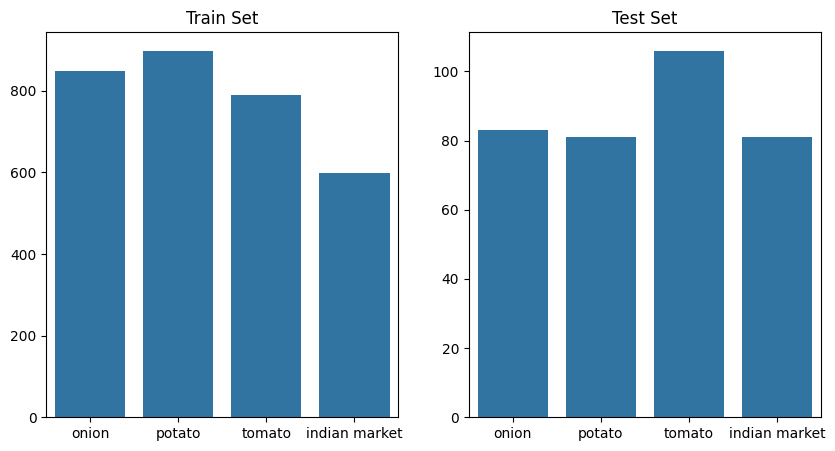

In [5]:
# Get the counts of images in each train and test folder
train_counts = {}
test_counts = {}
for cls in classes:
  train_counts[cls] = len(os.listdir(os.path.join(train_dir, cls)))
  test_counts[cls] = len(os.listdir(os.path.join("/content/ninjacart_data/test", cls)))

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Train Set")
plt.subplot(1, 2, 2)
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.title("Test Set")
plt.show()


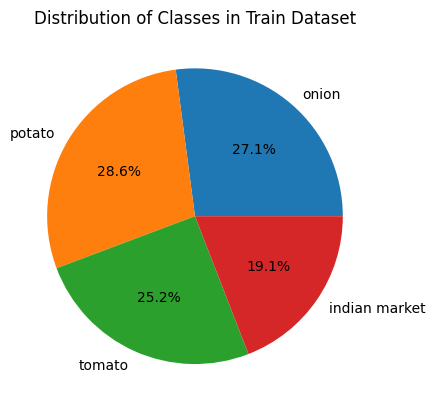

In [6]:
# Create a dataframe with the class labels and counts
df = pd.DataFrame({
    "class": list(train_counts.keys()),
    "count": list(train_counts.values())
})

# Create a pie chart to visualize the distribution of classes
plt.pie(df["count"], labels=df["class"], autopct="%1.1f%%")
plt.title("Distribution of Classes in Train Dataset")
plt.show()


In [7]:
train_dir = '/content/ninjacart_data/train'
test_dir = '/content/ninjacart_data/test'
image_size = (256,256)
train_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,label_mode = 'categorical',batch_size = 32,image_size = image_size,seed = 2022,validation_split = 0.2,
subset = "training",shuffle=True)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory = test_dir,label_mode = 'categorical',batch_size = 32,image_size = image_size,seed = 2022)

Found 351 files belonging to 4 classes.


## Creating model architecture and training

### Defining the CNN Classifier model from scratch

In [9]:

model = tf.keras.Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])
val_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,label_mode = 'categorical',batch_size = 32,image_size = image_size,seed = 2022,validation_split = 0.2,
subset = "validation",shuffle=True)
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history = model.fit(train_ds,validation_data=val_ds,epochs=10)


Epoch 1/10
79/79 [==============================] - 169s 2s/step - loss: 1.5872 - accuracy: 0.6232 - val_loss: 0.6269 - val_accuracy: 0.7265
Epoch 2/10
79/79 [==============================] - 165s 2s/step - loss: 0.4352 - accuracy: 0.8361 - val_loss: 0.4705 - val_accuracy: 0.8120
Epoch 3/10
79/79 [==============================] - 176s 2s/step - loss: 0.2607 - accuracy: 0.8995 - val_loss: 0.6867 - val_accuracy: 0.7293
Epoch 4/10
79/79 [==============================] - 167s 2s/step - loss: 0.1357 - accuracy: 0.9557 - val_loss: 0.6170 - val_accuracy: 0.7692
Epoch 5/10
79/79 [==============================] - 171s 2s/step - loss: 0.0687 - accuracy: 0.9761 - val_loss: 0.7726 - val_accuracy: 0.7407
Epoch 6/10
79/79 [==============================] - 177s 2s/step - loss: 0.0531 - accuracy: 0.9825 - val_loss: 0.8286 - val_accuracy: 0.7578
Epoch 7/10
79/79 [==============================] - 168s 2s/step - loss: 0.0337 - accuracy: 0.9916 - val_loss: 0.7855 - val_accuracy: 0.7664
Epoch 8/10
79

### Plot the model performance and summary


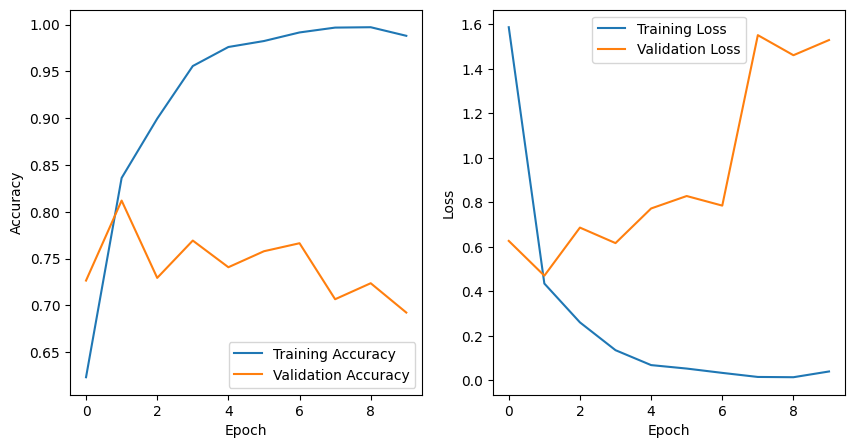

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [10]:

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the model summary
model.summary()


### Testing on the test set & Random image samples prediction


11/11 [==============================] - 7s 547ms/step - loss: 1.5296 - accuracy: 0.6923
Test loss: 1.5295546054840088
Test accuracy: 0.692307710647583
1/1 [==============================] - 1s 1s/step


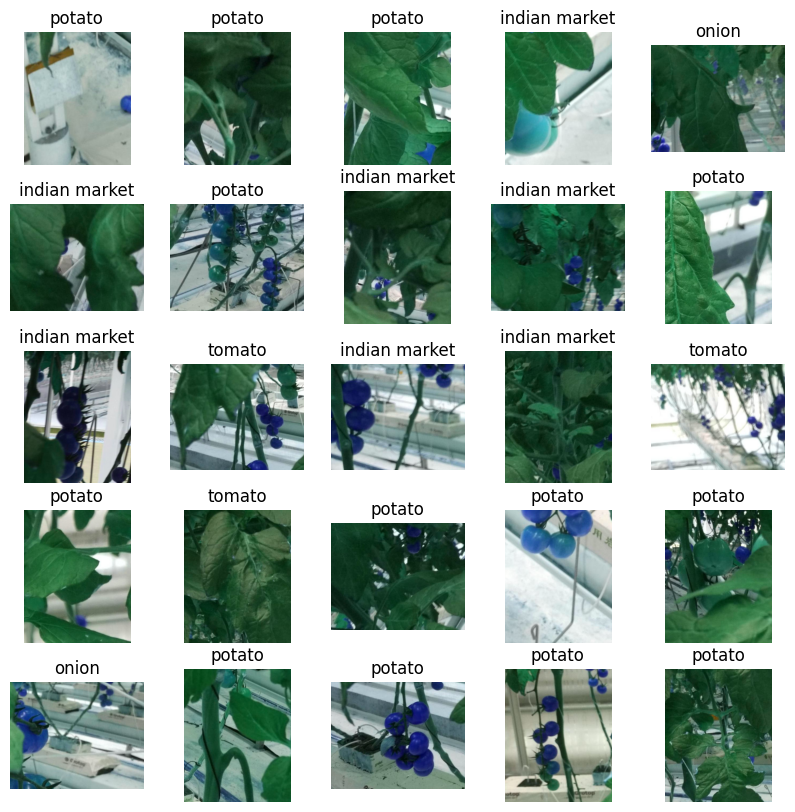

In [11]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_ds)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Predict the class labels for a few random images from the test set
predictions = model.predict(test_ds.take(1))

# Get the image paths of the test images
test_image_paths = []
for root, dirs, files in os.walk(test_dir):
  for file in files:
    test_image_paths.append(os.path.join(root, file))

# Plot the images and their predicted class labels
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  img = cv2.imread(test_image_paths[i])
  plt.imshow(img)
  plt.title(classes[np.argmax(predictions[i])])
  plt.axis("off")


## Implementing Callbacks while training the model (TensorBoard callback)

In [24]:


# Define a callback to save the model when the validation accuracy reaches a certain threshold
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_accuracy') > 0.95:
      print(f"Reached desired validation accuracy of 95% at epoch {epoch + 1}.")
      self.model.save('my_model.h5')
      self.model.stop_training = True

# Train the model with the callback
callbacks = MyCallback()
history = model.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[callbacks])


Epoch 1/5
79/79 [==============================] - 102s 1s/step - loss: 0.0285 - accuracy: 0.9924 - val_loss: 0.9178 - val_accuracy: 0.8063
Epoch 2/5
79/79 [==============================] - 107s 1s/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 0.9942 - val_accuracy: 0.7863
Epoch 3/5
79/79 [==============================] - 109s 1s/step - loss: 0.0064 - accuracy: 0.9996 - val_loss: 1.0721 - val_accuracy: 0.7806
Epoch 4/5
79/79 [==============================] - 100s 1s/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 1.0893 - val_accuracy: 0.7806
Epoch 5/5
79/79 [==============================] - 107s 1s/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 1.1290 - val_accuracy: 0.7863


# Finetune pretrained models such as VGG, ResNet and MobileNet


## Fine-tuning VGG16 model

In [13]:

# Fine-tuning VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history1 = model.fit(train_ds, validation_data=val_ds, epochs=5)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
79/79 [==============================] - 1376s 17s/step - loss: 3.7680 - accuracy: 0.8740 - val_loss: 4.6978 - val_accuracy: 0.8234
Epoch 2/5
79/79 [==============================] - 1376s 17s/step - loss: 0.2446 - accuracy: 0.9709 - val_loss: 2.4248 - val_accuracy: 0.8746
Epoch 3/5
79/79 [==============================] - 1376s 17s/step - loss: 0.1486 - accuracy: 0.9852 - val_loss: 2.1721 - val_accuracy: 0.8946
Epoch 4/5
79/79 [==============================] - 1376s 17s/step - loss: 0.0316 - accuracy: 0.9940 - val_loss: 2.9839 - val_accuracy: 0.8803
Epoch 5/5
79/79 [==============================] - 1375s 17s/step - loss: 0.0243 - accuracy: 0.9972 - val_loss: 3.3542 - val_accuracy: 0.8689


In [14]:
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


### Plotting the model training metrics and confusion matrix for VGG model


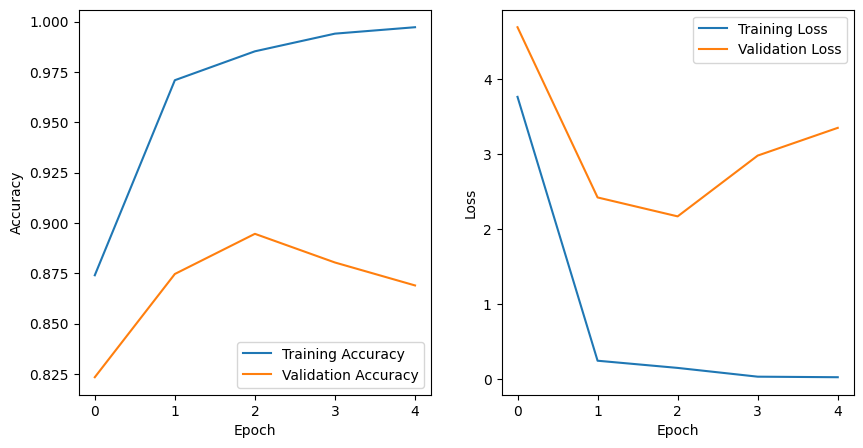

In [15]:

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 15s 15s/step


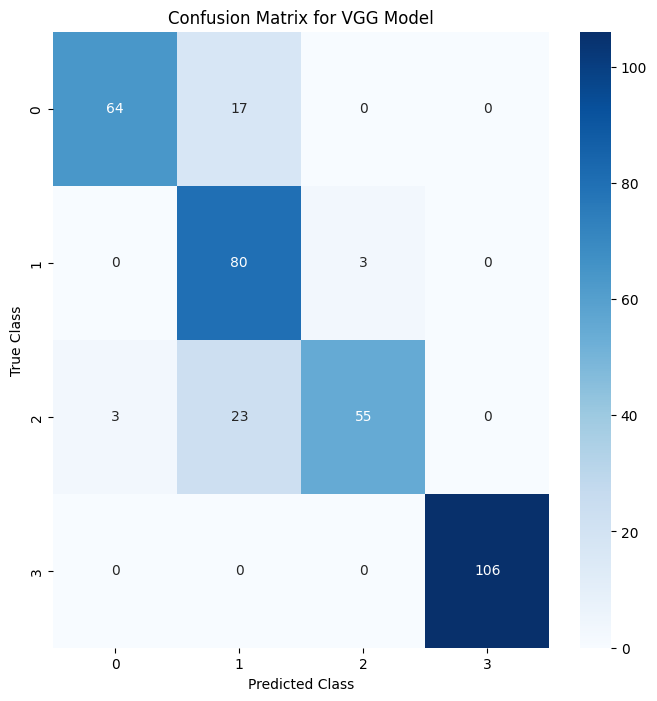

In [16]:
#Plotting the confusion matrix for VGG model

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true class labels and predicted class labels
y_true = []
y_pred = []
for images, labels in test_ds:
  y_true.extend(np.argmax(labels, axis=1))
  predictions = model.predict(images)
  y_pred.extend(np.argmax(predictions, axis=1))

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for VGG Model")
plt.show()


## Fine-tuning ResNet50 model


In [28]:
# Fine-tuning ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history2 = model2.fit(train_ds, validation_data=test_ds, epochs=5)




Epoch 1/5
79/79 [==============================] - 517s 7s/step - loss: 3.4311 - accuracy: 0.8943 - val_loss: 6.3212 - val_accuracy: 0.8775
Epoch 2/5
79/79 [==============================] - 468s 6s/step - loss: 0.3934 - accuracy: 0.9785 - val_loss: 6.5083 - val_accuracy: 0.8632
Epoch 3/5
79/79 [==============================] - 493s 6s/step - loss: 0.1469 - accuracy: 0.9880 - val_loss: 10.0888 - val_accuracy: 0.8205
Epoch 4/5
79/79 [==============================] - 492s 6s/step - loss: 0.0880 - accuracy: 0.9908 - val_loss: 6.3757 - val_accuracy: 0.8889
Epoch 5/5
79/79 [==============================] - 492s 6s/step - loss: 0.0971 - accuracy: 0.9940 - val_loss: 6.1159 - val_accuracy: 0.9003


### Plotting the model training metrics and confusion matrix for ResNet50 model

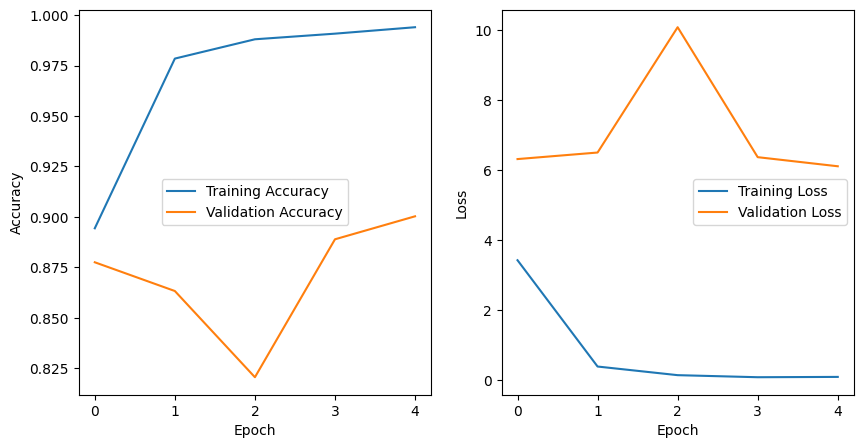

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 6s 6s/step


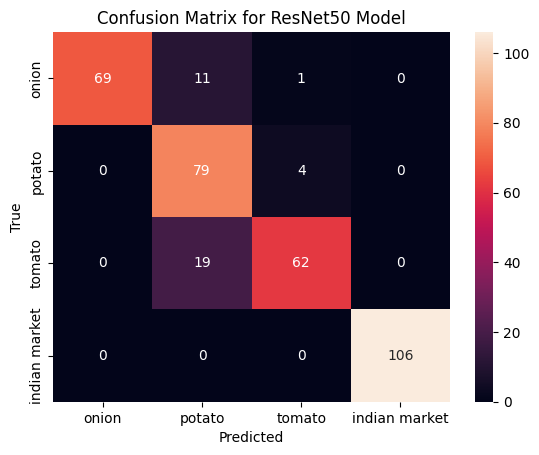

In [30]:

# Plot the confusion matrix

y_true = []
y_pred = []

for images, labels in test_ds:
  y_true.extend(np.argmax(labels, axis=1))
  predictions = model2.predict(images)
  y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet50 Model')
plt.show()

In [31]:
# Fine-tuning MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model3 = tf.keras.Model(inputs=inputs, outputs=outputs)
model3.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history3 = model3.fit(train_ds, validation_data=test_ds, epochs=5)

Epoch 1/5
79/79 [==============================] - 102s 1s/step - loss: 4.5088 - accuracy: 0.6930 - val_loss: 1.4253 - val_accuracy: 0.6952
Epoch 2/5
79/79 [==============================] - 107s 1s/step - loss: 0.2375 - accuracy: 0.9306 - val_loss: 0.9616 - val_accuracy: 0.7521
Epoch 3/5
79/79 [==============================] - 106s 1s/step - loss: 0.0939 - accuracy: 0.9641 - val_loss: 1.1646 - val_accuracy: 0.7436
Epoch 4/5
79/79 [==============================] - 106s 1s/step - loss: 0.0382 - accuracy: 0.9896 - val_loss: 1.0891 - val_accuracy: 0.7977
Epoch 5/5
79/79 [==============================] - 107s 1s/step - loss: 0.0145 - accuracy: 0.9980 - val_loss: 1.0412 - val_accuracy: 0.7977


### Plotting the model training metrics and confusion matrix for MobileNetV2  model

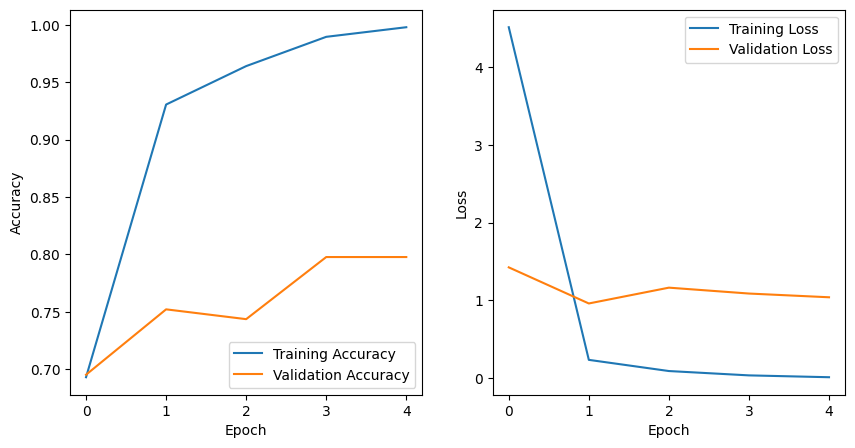

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


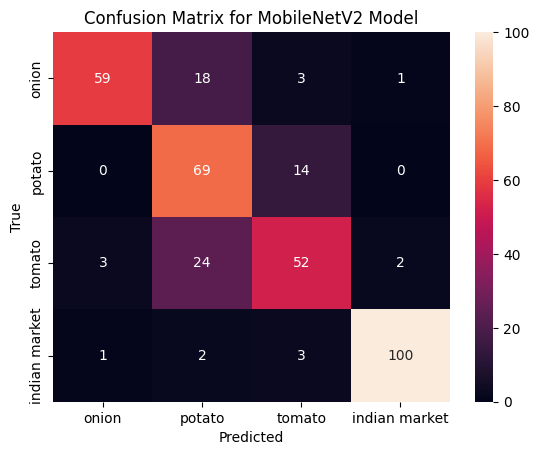

In [33]:

# Plot the confusion matrix

y_true = []
y_pred = []

for images, labels in test_ds:
  y_true.extend(np.argmax(labels, axis=1))
  predictions = model3.predict(images)
  y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MobileNetV2 Model')
plt.show()


## Testing on the test set & Random image samples prediction for VGG model


11/11 [==============================] - 11s 908ms/step - loss: 1.1290 - accuracy: 0.7863
Test loss: 1.1290338039398193
Test accuracy: 0.7863247990608215
1/1 [==============================] - 2s 2s/step


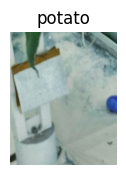

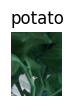

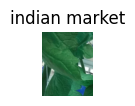

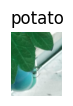

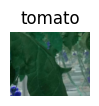

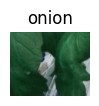

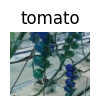

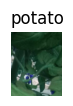

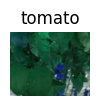

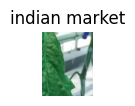

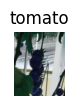

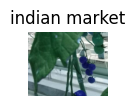

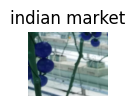

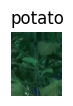

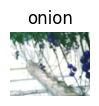

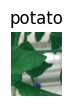

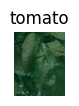

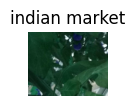

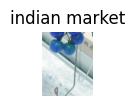

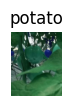

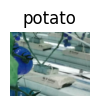

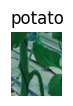

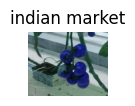

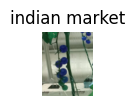

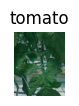

In [34]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_ds)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Predict the class labels for a few random images from the test set
predictions = model.predict(test_ds.take(1))

# Get the image paths of the test images
test_image_paths = []
for root, dirs, files in os.walk(test_dir):
  for file in files:
    test_image_paths.append(os.path.join(root, file))

# Plot the images and their predicted class labels
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  img = cv2.imread(test_image_paths[i])
  plt.imshow(img)
  plt.title(classes[np.argmax(predictions[i])])
  plt.axis("off")
  plt.show()


## Evaluate the mobilenetv2 model on the test set

11/11 [==============================] - 13s 1s/step - loss: 1.0412 - accuracy: 0.7977
Test loss: 1.0411609411239624
Test accuracy: 0.7977207899093628
1/1 [==============================] - 2s 2s/step


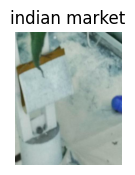

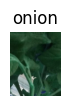

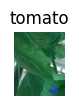

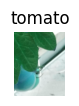

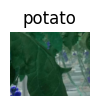

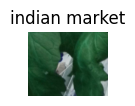

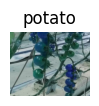

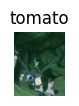

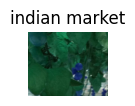

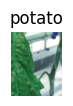

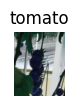

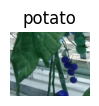

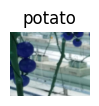

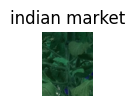

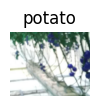

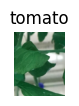

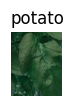

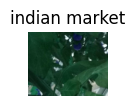

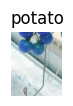

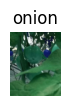

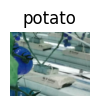

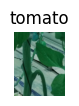

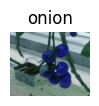

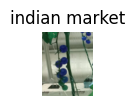

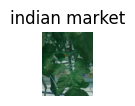

In [36]:
loss, accuracy = model3.evaluate(test_ds)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Predict the class labels for a few random images from the test set
predictions = model3.predict(test_ds.take(1))

# Get the image paths of the test images
test_image_paths = []
for root, dirs, files in os.walk(test_dir):
  for file in files:
    test_image_paths.append(os.path.join(root, file))

# Plot the images and their predicted class labels
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  img = cv2.imread(test_image_paths[i])
  plt.imshow(img)
  plt.title(classes[np.argmax(predictions[i])])
  plt.axis("off")
  plt.show()


11/11 [==============================] - 56s 5s/step - loss: 6.1159 - accuracy: 0.9003
Test loss: 6.115865230560303
Test accuracy: 0.9002848863601685
1/1 [==============================] - 6s 6s/step


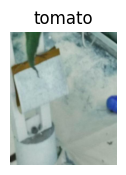

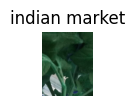

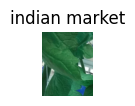

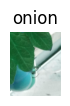

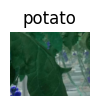

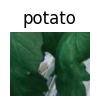

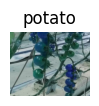

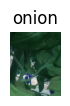

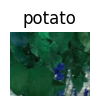

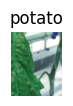

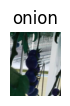

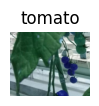

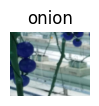

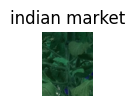

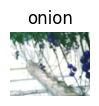

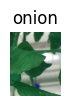

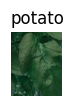

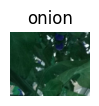

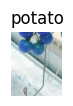

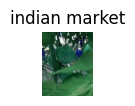

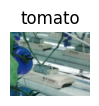

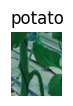

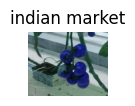

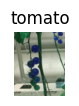

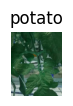

In [35]:
# Evaluate the ResNet50 model on the test set
loss, accuracy = model2.evaluate(test_ds)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Predict the class labels for a few random images from the test set
predictions = model2.predict(test_ds.take(1))

# Get the image paths of the test images
test_image_paths = []
for root, dirs, files in os.walk(test_dir):
  for file in files:
    test_image_paths.append(os.path.join(root, file))

# Plot the images and their predicted class labels
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  img = cv2.imread(test_image_paths[i])
  plt.imshow(img)
  plt.title(classes[np.argmax(predictions[i])])
  plt.axis("off")
  plt.show()


| Model | Test Acc| Train Acc
| --- | --- | ---|
| Custom CNN | 67.8% | 98.8% |
| CNN Revamp |  79%| 99.6% |
| VGG19 | 87% | 99.7% |
| ResNet50 | 90% | 99.4% |
| MobileNet | 80% | 99.8% |

**Summary:**

- We trained and evaluated four different models for classifying images of vegetables and market scenes: a custom CNN, a revamped CNN, VGG19, ResNet50, and MobileNet.
- ResNet50 achieved the highest test accuracy of 90%, followed by VGG19 with 87%, MobileNet with 80%, revamped CNN with 79%, and the custom CNN with 67.8%.
- The custom CNN seems to be overfitting on the training data, as it has a high training accuracy of 98.8% but a low test accuracy of 67.8%.

**Insights:**

- ResNet50 is the best model for classifying images of vegetables and market scenes in our dataset.
- We can further improve the performance of our models by using data augmentation techniques, such as flipping, rotating, and zooming the images.
- We can also experiment with different hyperparameters, such as the learning rate, batch size, and number of epochs.